<a href="https://colab.research.google.com/github/mingshey/python_QM/blob/main/Griffiths_QM_Ex_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Griffiths, _Introduction to Quantum Mechanics_
## Example 1.2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
g = 9.8 # [m/s^2]
h = 10 # [m]
tf = np.sqrt(2*h/g) # [s]

def x_of_t(t):
  global g
  return 1/2 * g * t**2

In [ ]:
t = np.random.uniform(0, tf, 1000000)
t = np.sort(t)
x = x_of_t(t)

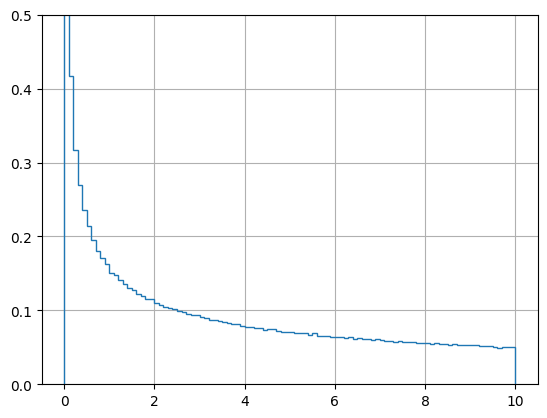

In [ ]:
plt.grid()
plt.ylim(0, 0.5)
plt.hist(x, bins=100, histtype='step', density=True);

떨어져 내린 거리:
$x(t) = \dfrac{1}{2}gt^2$

$t = \sqrt{\dfrac{2x}{g}}$

${\mathrm d}x = g t {\mathrm d}t$

${\mathrm d}t = \dfrac{{\mathrm d}x}{gt} = \dfrac{{\mathrm d}x}{\sqrt{2gx}}$

전체 낙하 시간 $T = \sqrt{2h/g}$

특정 사진이 시간 $t \sim t+dt$ 사이에 찍힐 확률: ${{\mathrm d}t}/{T}$

$\Rightarrow$ 사진에서 물체가 $x \sim x+{\mathrm d}x$ 사이에 있을 확률:

$$\dfrac{{\mathrm d}t}{T} = \dfrac{{\mathrm d}x}{\sqrt{2gx}}\sqrt{\dfrac{g}{2h}} = \dfrac{1}{2\sqrt{hx}}{\mathrm d}x$$

$\therefore$ $x$에 대한 확률 밀도:

$\rho(x) = \dfrac{1}{2\sqrt{hx}}$



In [ ]:
def rho_x(x):
  return 1/(2 * np.sqrt(h*x))

<ipython-input-11-ba1beecd5222>:2: RuntimeWarning: divide by zero encountered in divide
  return 1/(2 * np.sqrt(h*x))


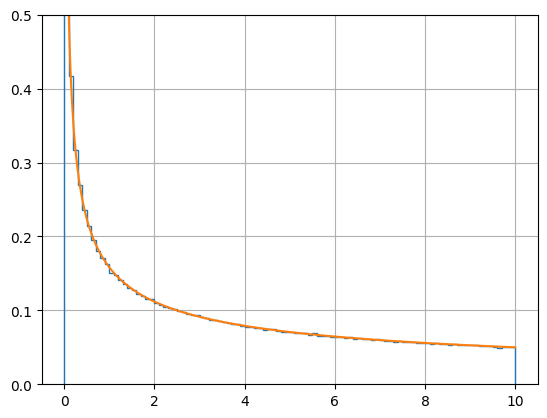

In [ ]:
xs = np.linspace(0, h, 1000)
plt.grid()
plt.ylim(0, 0.5)
plt.hist(x, bins=100, histtype='step', density=True)
plt.plot(xs, rho_x(xs))

In [ ]:
from scipy.integrate import quad
Ptot = quad(rho_x, 0, h)[0]
Ptot

1.0000000000000002

In [ ]:
xavg = quad(lambda x: x*rho_x(x), 0, h)[0] / Ptot
xavg

3.3333333333333313

In [ ]:
print(f"<x> = {xavg / h:.3f} h")

<x> = 0.333 h


Problem 1.2

(a)

In [ ]:
xsq_avg = quad(lambda x: x**2*rho_x(x), 0, h)[0] / Ptot
print(f"<x²> = {xsq_avg / h**2:.3f} h²")

<x²> = 0.200 h²


In [ ]:
xavg_sq = xavg**2
print(f"<x>² = {xavg_sq / h**2:.3f} h²")

<x>² = 0.111 h²


$\sigma^2 = \left<x^2\right>-\left<x\right>^2$

In [ ]:
sigma_sq = xsq_avg - xavg_sq
print(f"σ² = {sigma_sq / h**2:.3f} h²")

σ² = 0.089 h²


$$ \sigma^2 = \int_0^h (x-\left<x\right>)^2 \rho(x) {\mathrm d}x $$

In [ ]:
var = quad(lambda x: (x - xavg)**2 * rho_x(x), 0, h)[0] / Ptot
print (f"σ² = {var / h**2:.3f} h²")

σ² = 0.089 h²


In [ ]:
stdev = np.sqrt(var)
print(f"σ = {stdev / h:.3f} h")

σ = 0.298 h


(b)

In [ ]:
Pnear = quad(rho_x, xavg - stdev, xavg + stdev)[0]
print(f"P(|Δx| <= σ) = {Pnear:.3f}")
Pfar = 1 - Pnear
print(f"P(|Δx| > σ) = {Pfar:.3f}")

P(|Δx| <= σ) = 0.607
P(|Δx| > σ) = 0.393
